In [17]:
import sys
sys.path.append('../src/')
from tqdm import tqdm
import pandas as pd
import wandb
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


In [18]:

api = wandb.Api()
entity, project = "ajzero", "AlphaZero"

# tags = ['2024-04-12-15-31-26']
# filters = {"tags": {"$in": tags}}
tags = ["2024-05-05-17-27-03"]
filters = {"tags": {"$in": tags}, "state": "finished"}
runs = api.runs(entity + "/" + project, filters=filters)
runs

<Runs ajzero/AlphaZero>

In [19]:
data = []
for run in tqdm(runs):
    summary = run.summary._json_dict
    config = run.config
    summary.update(config)
    data.append(summary)

df = pd.DataFrame(data)

# filter out runs with Evaluation/Mean_Returns == -100
df = df[df['Evaluation/Mean_Returns'] != -100]

ncols, nrows = df["ncols"][0], 8
df

100%|██████████| 12/12 [00:00<00:00, 52648.17it/s]


,Evaluation/Timesteps,Evaluation/Mean_Discounted_Returns,_wandb,_timestamp,Evaluation/Mean_Returns,Evaluation/Discounted_Returns,_step,Evaluation/Entropies,trajectories,_runtime,...,policy_loss_weight,sample_batch_ratio,tree_value_transform,observation_embedding,regularization_weight,root_selection_policy,episodes_per_iteration,tree_evaluation_policy,replay_buffer_multiplier,selection_value_transform
0,"{'_type': 'histogram', 'bins': [14, 15.34375, ...",0.416149,{'runtime': 214},1.714924e+09,0.85,"{'values': [15, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,"{'_type': 'histogram', 'bins': [0.189535155892...","[[0, 8, 9, 10, 11, 12, 13, 21, 22, 30, 31, 39,...",215.800918,...,0.3,4,identity,coordinate,0.000001,PolicyUCT,6,mvc,15,identity
1,"{'_type': 'histogram', 'bins': [14, 14.28125, ...",0.467747,{'runtime': 67},1.714924e+09,1.00,"{'values': [3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...",0,"{'_type': 'histogram', 'bins': [0.157449245452...","[[0, 1, 2, 10, 11, 12, 13, 14, 22, 30, 31, 39,...",69.160675,...,0.3,4,identity,coordinate,0.000001,UCT,6,mvc,15,identity
2,"{'_type': 'histogram', 'bins': [91, 91.140625,...",0.000099,{'runtime': 410},1.714924e+09,0.01,"{'_type': 'histogram', 'bins': [0, 0.000154505...",0,"{'_type': 'histogram', 'bins': [0.977346479892...","[[0, 1, 1, 9, 1, 2, 3, 4, 4, 5, 6, 14, 15, 15,...",412.029043,...,0.3,4,identity,coordinate,0.000001,UCT,6,visit,15,identity
3,"{'values': [43, 22, 13, 0, 5, 4, 0, 1, 2, 0, 1...",0.421466,{'runtime': 69},1.714923e+09,0.93,"{'bins': [0, 0.008020969107747078, 0.016041938...",0,"{'_type': 'histogram', 'bins': [0.172786235809...","[[0, 8, 9, 10, 11, 12, 13, 14, 22, 30, 38, 37,...",70.728543,...,0.3,4,identity,coordinate,0.000001,PolicyUCT,6,mvc,15,identity
4,"{'_type': 'histogram', 'bins': [14, 14.171875,...",0.476116,{'runtime': 34},1.714923e+09,1.00,"{'bins': [0.29198893904685974, 0.2954475879669...",0,"{'_type': 'histogram', 'values': [4, 0, 1, 2, ...","[[0, 8, 9, 10, 18, 26, 27, 28, 36, 37, 38, 39,...",36.067179,...,0.3,4,identity,coordinate,0.000001,UCT,6,mvc,15,identity
5,"{'_type': 'histogram', 'bins': [99.5, 99.51562...",0.000000,{'runtime': 199},1.714923e+09,0.00,"{'_type': 'histogram', 'values': [0, 0, 0, 0, ...",0,"{'values': [1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1...","[[0, 0, 1, 2, 2, 2, 10, 9, 1, 2, 3, 4, 5, 6, 1...",200.482519,...,0.3,4,identity,coordinate,0.000001,UCT,6,visit,15,identity
6,"{'_type': 'histogram', 'bins': [14, 15.34375, ...",0.411048,{'runtime': 31},1.714923e+09,0.98,"{'_type': 'histogram', 'bins': [0, 0.008020969...",0,"{'_type': 'histogram', 'bins': [0.155700281262...","[[0, 8, 16, 17, 25, 33, 25, 33, 25, 26, 27, 26...",32.835694,...,0.3,4,identity,coordinate,0.000001,PolicyUCT,6,mvc,15,identity
7,"{'_type': 'histogram', 'bins': [14, 14.28125, ...",0.456760,{'runtime': 20},1.714923e+09,1.00,"{'values': [1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0...",0,"{'bins': [0.18705704808235168, 0.1903233081102...","[[0, 8, 16, 24, 25, 33, 34, 26, 27, 28, 36, 37...",22.083045,...,0.3,4,identity,coordinate,0.000001,UCT,6,mvc,15,identity
8,"{'_type': 'histogram', 'bins': [36, 37, 38, 39...",0.007839,{'runtime': 90},1.714923e+09,0.20,"{'_type': 'histogram', 'bins': [0, 0.002595051...",0,"{'_type': 'histogram', 'bins': [0.940369546413...","[[0, 1, 2, 10, 2, 3, 4, 12, 4, 4, 12, 13, 14, ...",92.398074,...,0.3,4,identity,coordinate,0.000001,UCT,6,visit,15,identity
9,"{'values': [33, 8, 14, 9, 8, 10, 1, 3, 4, 3, 0...",0.403146,{'runtime': 16},1.714923e+09,0.97,"{'values': [3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...",0,"{'_type': 'histogram', 'bins': [0.146782577037...","[[0, 8, 16, 17, 25, 33, 25, 26, 34, 33, 34, 26...",17.265266,...,0.3,4,identity,coordinate,0.000001,PolicyUCT,6,mvc,15,identity


In [20]:
# filter out 128 planning budget
# Assuming 'df' is your DataFrame
df['policy_combination'] = df['tree_evaluation_policy'] + "+" + df['selection_policy']

# Group the DataFrame by both 'policy_combination' and 'planning_budget'
grouped = df.groupby(['policy_combination', 'planning_budget'])['trajectories']


# Aggregate the trajectories lists within each group
aggregated_trajectories = grouped.sum()
aggregated_trajectories


policy_combination  planning_budget
mvc+PolicyUCT       16                 [[0, 8, 16, 17, 25, 33, 25, 26, 34, 33, 34, 26...
                    32                 [[0, 8, 16, 17, 25, 33, 25, 33, 25, 26, 27, 26...
                    64                 [[0, 8, 9, 10, 11, 12, 13, 14, 22, 30, 38, 37,...
                    128                [[0, 8, 9, 10, 11, 12, 13, 21, 22, 30, 31, 39,...
mvc+UCT             16                 [[0, 1, 2, 3, 4, 12, 20, 21, 22, 30, 38, 39, 4...
                    32                 [[0, 8, 16, 24, 25, 33, 34, 26, 27, 28, 36, 37...
                    64                 [[0, 8, 9, 10, 18, 26, 27, 28, 36, 37, 38, 39,...
                    128                [[0, 1, 2, 10, 11, 12, 13, 14, 22, 30, 31, 39,...
visit+UCT           16                 [[0, 1, 1, 9, 10, 11, 12, 4, 5, 6, 6, 6, 6, 14...
                    32                 [[0, 1, 2, 10, 2, 3, 4, 12, 4, 4, 12, 13, 14, ...
                    64                 [[0, 0, 1, 2, 2, 2, 10, 9, 1, 2, 3,

In [21]:
# remove all trajectories with a length of 100
print(aggregated_trajectories.apply(lambda x: len(x)).sum())
filtered_aggregated_trajectories = aggregated_trajectories.apply(lambda x: [traj for traj in x if len(traj) != 100])
# check the total number of trajectories
filtered_aggregated_trajectories.apply(lambda x: len(x)).sum()

1200


818

/var/folders/lk/nt9x15z12v3_kjy4_vwkcf_r0000gn/T/ipykernel_61473/1038876361.py:25: RuntimeWarning: invalid value encountered in divide
  density = calculate_density(trajectories, ncols, nrows) / len(trajectories)
/Users/albin/sdk/miniforge3/envs/az10/lib/python3.10/site-packages/seaborn/matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
/Users/albin/sdk/miniforge3/envs/az10/lib/python3.10/site-packages/seaborn/matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


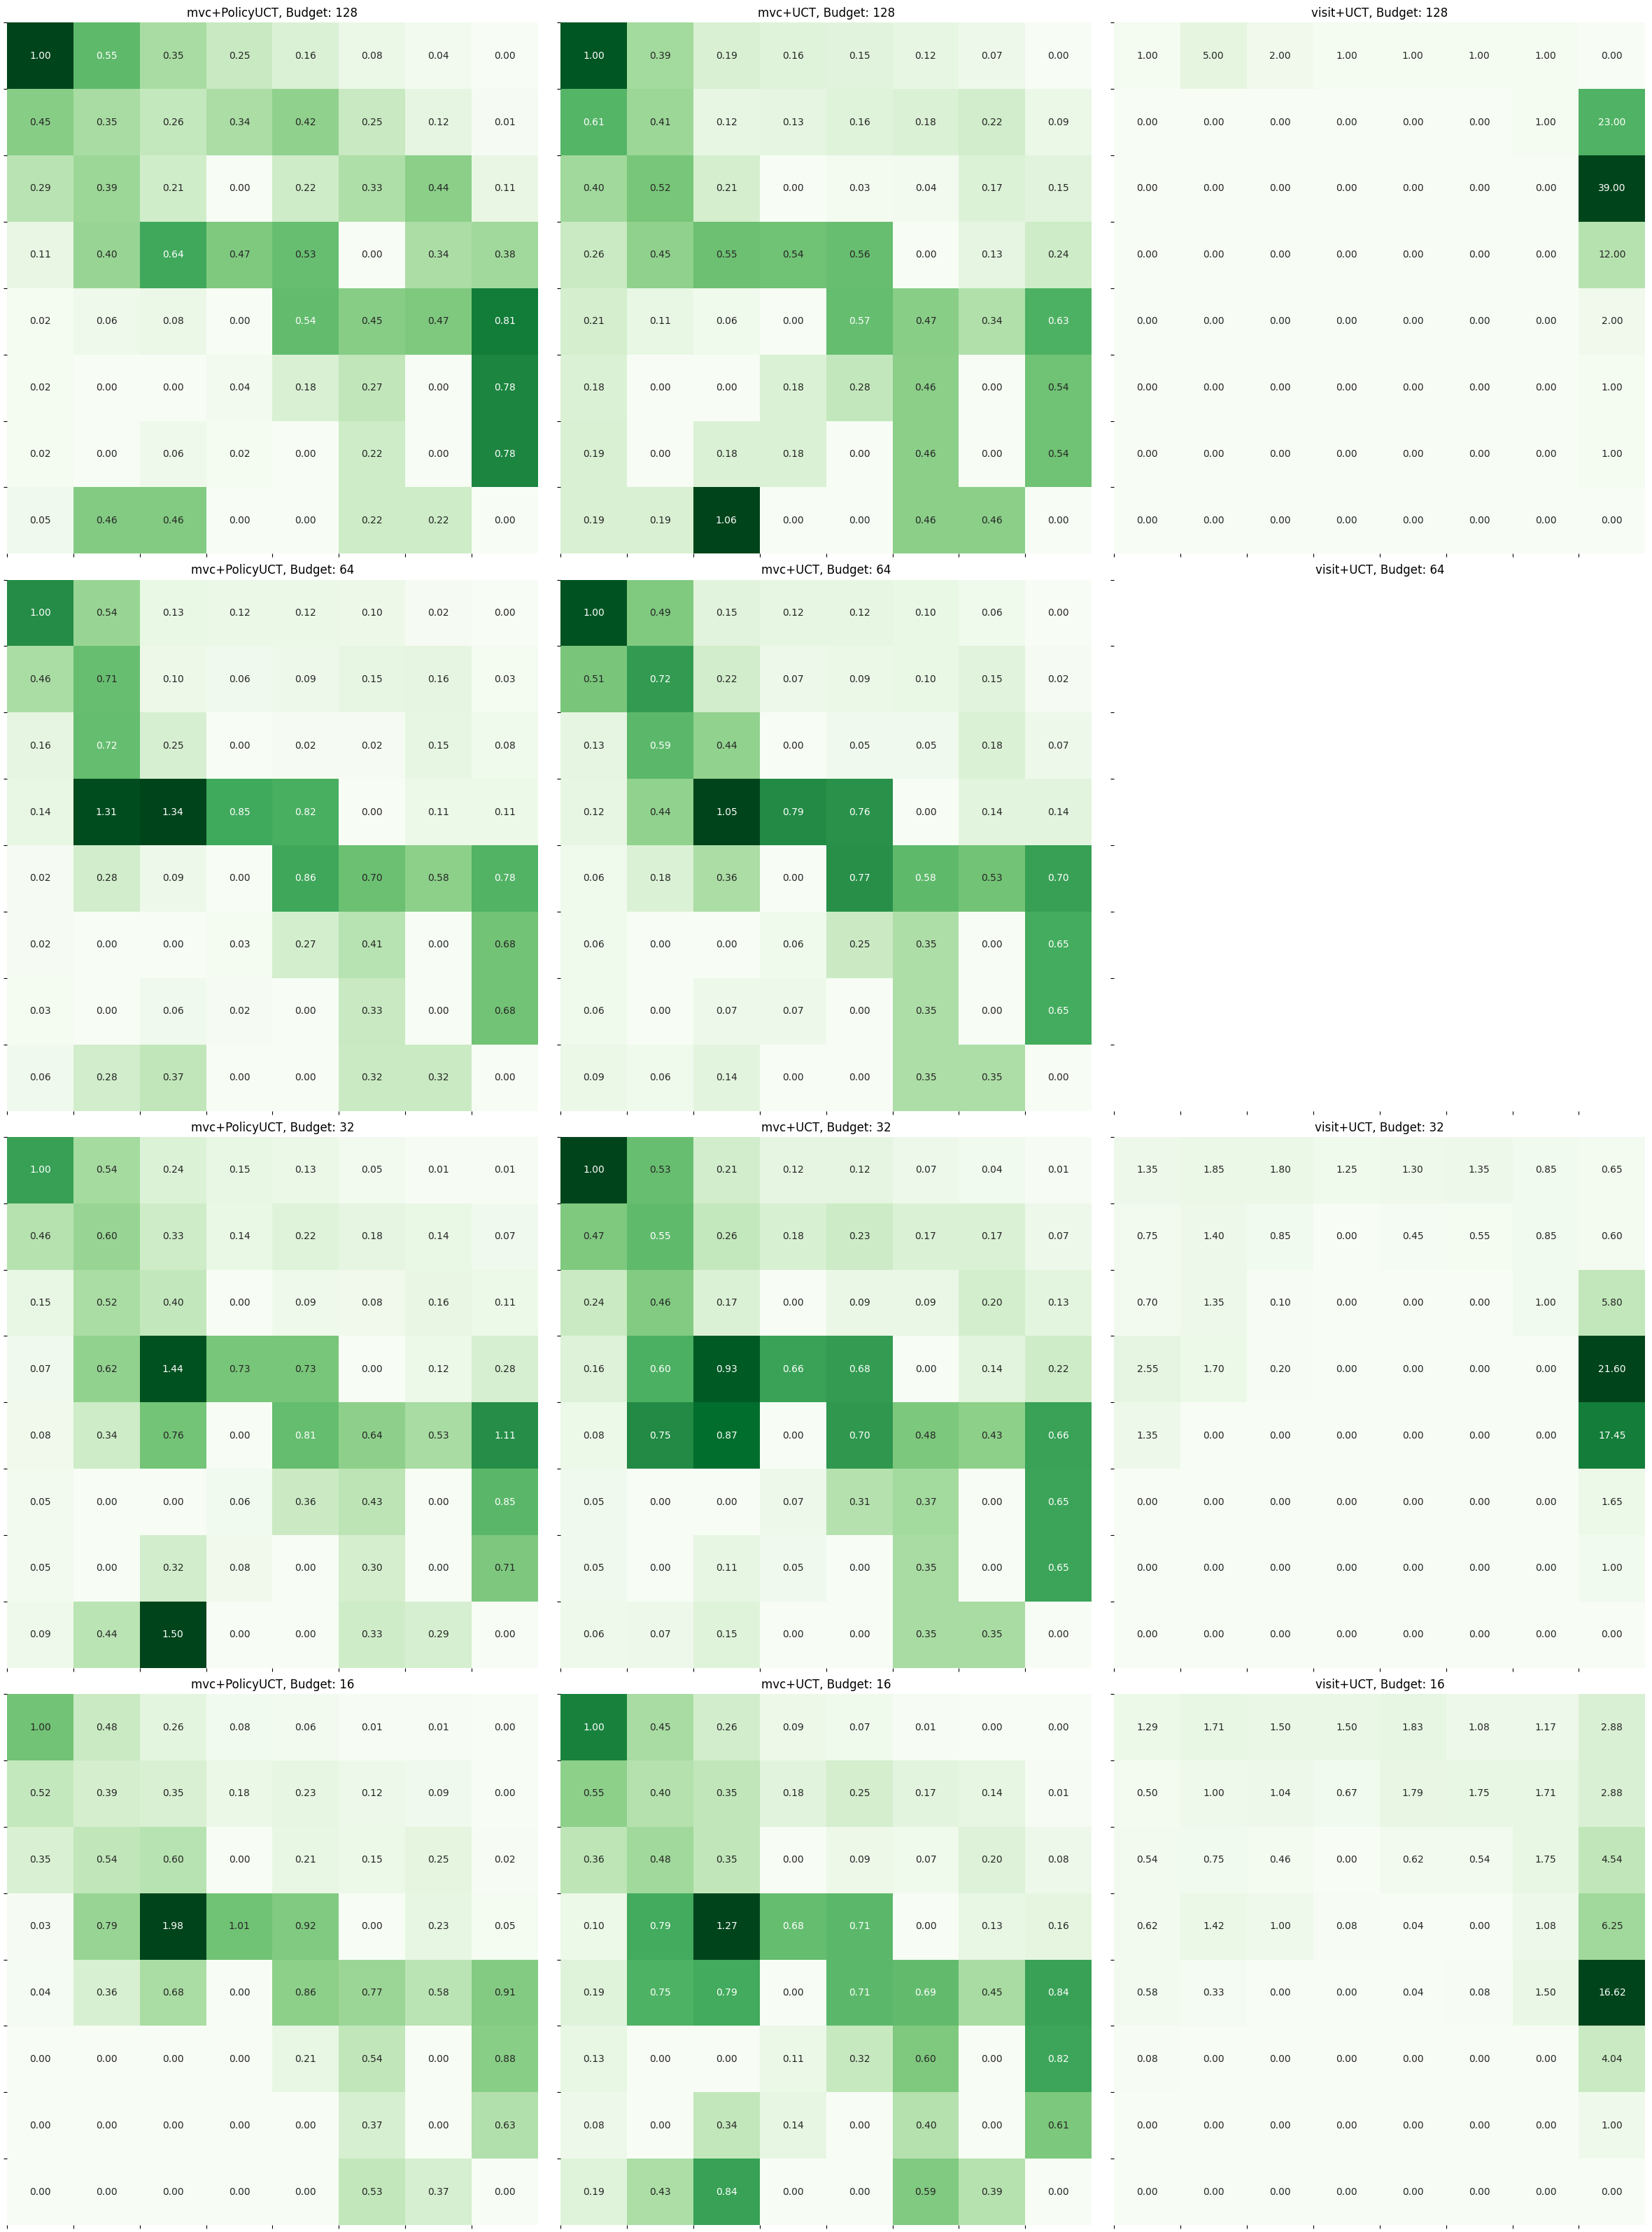

In [22]:
# Define functions to calculate coordinates and density
def obs_to_cords(state, ncols):
    row, col = divmod(state, ncols)
    return row, col

def calculate_density(trajectories, ncols, nrows):
    density = np.zeros((nrows, ncols))
    for trajectory in trajectories:
        for state in trajectory:
            row, col = obs_to_cords(state, ncols)
            density[row, col] += 1
    return density

# Determine the number of unique policy combinations and planning budgets
n_policies = len(df['policy_combination'].unique())
n_budgets = len(df['planning_budget'].unique())

# Prepare the plot
fig, axs = plt.subplots(n_budgets, n_policies, figsize=(ncols * n_policies, nrows * n_budgets))

# Plot each subgroup
for (policy_combination, planning_budget), trajectories in filtered_aggregated_trajectories.items():
    i = df['planning_budget'].unique().tolist().index(planning_budget)
    j = df['policy_combination'].unique().tolist().index(policy_combination)
    density = calculate_density(trajectories, ncols, nrows) / len(trajectories)
    ax = axs[i][j] if n_budgets > 1 and n_policies > 1 else axs
    sns.heatmap(density, ax=ax, cmap='Greens', cbar=False, annot=True, fmt='.2f')
    ax.set_xticks(range(ncols))
    ax.set_yticks(range(nrows))
    ax.set_aspect('equal')  # Set aspect ratio to be equal, making each cell square
    # set subtitle
    ax.set_title(f"{policy_combination}, Budget: {planning_budget}")

plt.tight_layout()
plt.savefig("outfiles/4x4lake_heurstic_density.pdf")
plt.show()


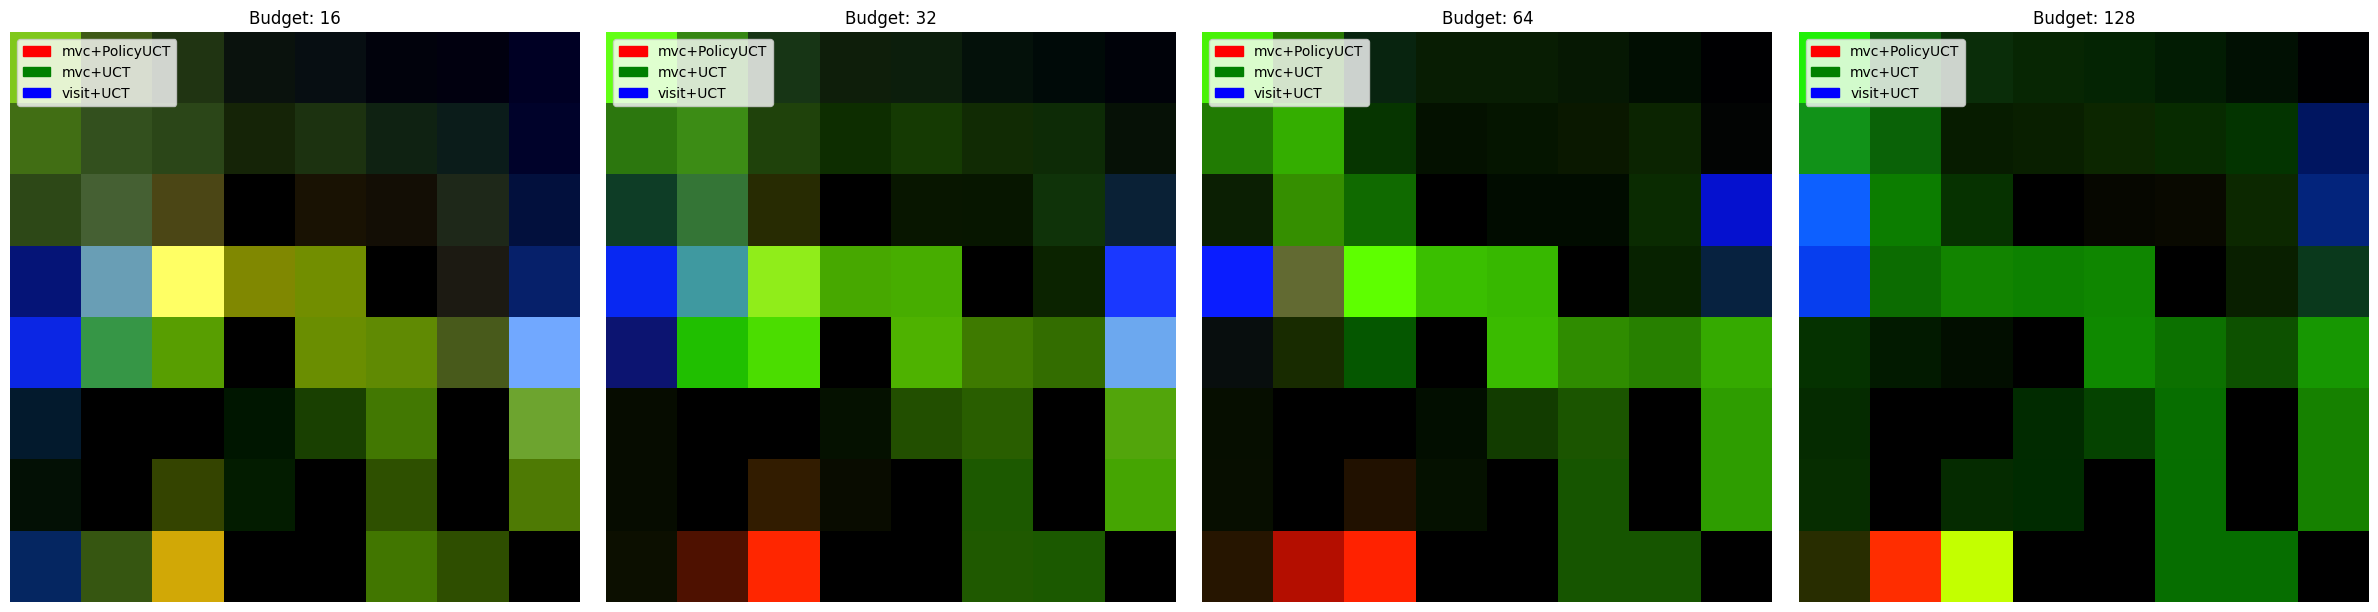

In [23]:
import matplotlib.patches as mpatches
grouped = df.groupby(['planning_budget', 'policy_combination'])['trajectories'].sum()


# Determine the number of unique planning budgets
n_budgets = len(grouped.index.get_level_values(0).unique())

# Prepare a single figure with multiple subplots (one for each planning_budget)
fig, axs = plt.subplots(1, n_budgets, figsize=(6 * n_budgets, 6))

# Iterate over each planning_budget and create RGB heatmaps
for idx, (planning_budget, budget_group) in enumerate(grouped.groupby(level=0)):
    rgb_image = np.zeros((nrows, ncols, 3))  # Initialize RGB layers
    colors = ['Red', 'Green', 'Blue']  # Map trajos keys to RGB channels
    channel_colors = {name: color for name, color in zip(budget_group.index.get_level_values(1), colors)}

    # Compute density for each policy combination and assign to RGB channels
    for jdx, ((_, policy_combination), trajectories) in enumerate(budget_group.items()):
        density = calculate_density(trajectories, ncols, nrows) / len(trajectories)
        norm_density = density / np.max(density, where=(density!=0), initial=1)  # Normalize avoiding division by zero
        rgb_image[:, :, jdx % 3] += norm_density  # Accumulate in RGB layers, repeating colors if more than 3 policies

    ax = axs[idx] if n_budgets > 1 else axs
    ax.imshow(rgb_image, aspect='equal')
    ax.axis('off')  # Hide grid lines and labels

    # Create a legend
    legend_patches = [mpatches.Patch(color=color, label=name) for name, color in channel_colors.items()]
    ax.legend(handles=legend_patches, loc='upper left')
    ax.set_title(f"Budget: {planning_budget}")

plt.tight_layout()
plt.savefig("outfiles/dist_training_cliff_rgb.pdf")
plt.show()

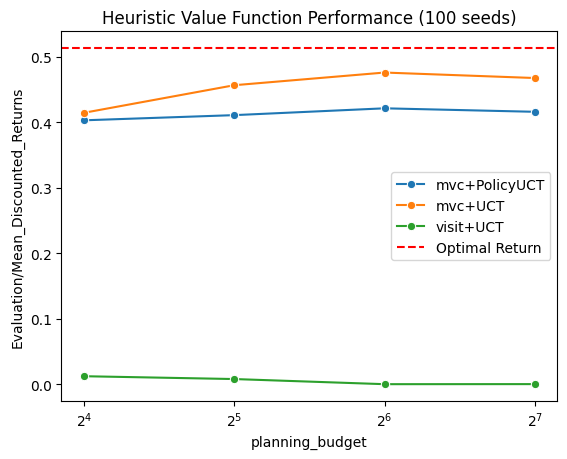

In [24]:
# plot Evaluation/Mean_Discounted_Returns from df vs planning_budget for each policy_combination

sns.lineplot(data=df, x='planning_budget', y='Evaluation/Mean_Discounted_Returns', hue='policy_combination', marker='o')
optimal_value = df["optimal_value"][0]
plt.axhline(optimal_value, color='red', linestyle='--', label='Optimal Return')
# set x axis to log2 scale
plt.xscale('log', base=2)
plt.legend()
plt.title('Heuristic Value Function Performance (100 seeds)')
plt.savefig("outfiles/4x4heuristic_value_function_performance.pdf")
plt.show()
